In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_excel('Data_Train.xlsx')

# EDA

In [3]:
df.shape

(10683, 11)

We have almost 11 columns and 10683 rows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We could observe that the Date_of_Journey, Duration,Dep_Time and Arrival Time are in object we have those in the int 

In [5]:
df['Dep_Time']=pd.to_datetime(df.Dep_Time)

In [6]:
df['Dep_Time']

0       2022-08-24 22:20:00
1       2022-08-24 05:50:00
2       2022-08-24 09:25:00
3       2022-08-24 18:05:00
4       2022-08-24 16:50:00
                ...        
10678   2022-08-24 19:55:00
10679   2022-08-24 20:45:00
10680   2022-08-24 08:20:00
10681   2022-08-24 11:30:00
10682   2022-08-24 10:55:00
Name: Dep_Time, Length: 10683, dtype: datetime64[ns]

In [7]:
df['Arrival_Time']=pd.to_datetime(df.Arrival_Time )

In [8]:
df['Arrival_Time']

0       2022-03-22 01:10:00
1       2022-08-24 13:15:00
2       2022-06-10 04:25:00
3       2022-08-24 23:30:00
4       2022-08-24 21:35:00
                ...        
10678   2022-08-24 22:25:00
10679   2022-08-24 23:20:00
10680   2022-08-24 11:20:00
10681   2022-08-24 14:10:00
10682   2022-08-24 19:15:00
Name: Arrival_Time, Length: 10683, dtype: datetime64[ns]

In [9]:
df['Date_of_Journey']=pd.to_datetime(df.Date_of_Journey)

In [10]:
df['Date_of_Journey']

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10683, dtype: datetime64[ns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


We could observe that the required columns are converted into datetime format

In [12]:
df['Journey_Day']=pd.to_datetime(df.Date_of_Journey, format='%d%m%y').dt.day

In [13]:
df['Journey_Day']

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Journey_Day, Length: 10683, dtype: int64

In [14]:
df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey, format="%d%m%y").dt.month

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Journey_Day      10683 non-null  int64         
 12  Journey_Month    10683 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(7)
memory usage: 1.1+ MB


we have the above columns in dataset in integet format ,Let us remove the date_of_journey from the column

In [16]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [17]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-08-24 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-24 05:50:00,2022-08-24 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-08-24 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-08-24 18:05:00,2022-08-24 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-08-24 16:50:00,2022-08-24 21:35:00,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2022-08-24 19:55:00,2022-08-24 22:25:00,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,2022-08-24 20:45:00,2022-08-24 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2022-08-24 08:20:00,2022-08-24 11:20:00,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2022-08-24 11:30:00,2022-08-24 14:10:00,2h 40m,non-stop,No info,12648,3,1


We have successfully removed the above column ,will proceed forward 

In [18]:
# converting duration column into list
duration=list(df["Duration"])

for i in range(len(duration)):
    # checking if duration contains only hour or minute
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+ " 0m"
        else:
            duration[i]="0h " + duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    
    # extracting hours from Duration
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    
    # extracting minutes from Duaration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [19]:
duration_hours

[2,
 7,
 19,
 5,
 4,
 2,
 15,
 21,
 25,
 7,
 13,
 2,
 2,
 12,
 2,
 26,
 4,
 22,
 23,
 20,
 5,
 15,
 2,
 2,
 13,
 15,
 5,
 5,
 2,
 2,
 2,
 13,
 2,
 22,
 5,
 10,
 5,
 2,
 6,
 11,
 11,
 8,
 22,
 2,
 12,
 2,
 2,
 2,
 16,
 19,
 3,
 25,
 2,
 3,
 2,
 16,
 15,
 2,
 6,
 25,
 12,
 27,
 10,
 10,
 2,
 10,
 2,
 1,
 13,
 2,
 1,
 26,
 7,
 13,
 5,
 2,
 2,
 1,
 19,
 2,
 14,
 2,
 22,
 9,
 10,
 21,
 5,
 18,
 12,
 18,
 9,
 11,
 17,
 13,
 2,
 2,
 2,
 3,
 1,
 16,
 12,
 12,
 7,
 24,
 2,
 8,
 7,
 14,
 30,
 19,
 15,
 2,
 12,
 10,
 5,
 15,
 16,
 10,
 2,
 11,
 2,
 1,
 14,
 20,
 2,
 23,
 18,
 16,
 2,
 2,
 8,
 16,
 3,
 2,
 14,
 23,
 21,
 21,
 2,
 10,
 8,
 8,
 5,
 8,
 11,
 27,
 8,
 20,
 4,
 8,
 2,
 24,
 2,
 12,
 12,
 23,
 16,
 2,
 25,
 26,
 28,
 2,
 25,
 9,
 4,
 15,
 1,
 2,
 9,
 2,
 22,
 3,
 11,
 9,
 12,
 17,
 5,
 25,
 20,
 13,
 18,
 1,
 9,
 16,
 2,
 4,
 5,
 24,
 2,
 2,
 4,
 25,
 6,
 3,
 18,
 2,
 12,
 19,
 2,
 8,
 9,
 2,
 3,
 2,
 12,
 2,
 9,
 2,
 9,
 29,
 2,
 5,
 9,
 10,
 4,
 1,
 11,
 2,
 2,
 10,
 2,
 10,
 1,
 9,
 

In [20]:
df["Duration_hours"]=duration_hours
df["Duration_mins"]=duration_mins

In [21]:
# dropping duration column
df.drop("Duration",axis=1,inplace=True)

Let's extract values from Dep_Time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [22]:
#departure time means the time when the journey starts from the source.

# extractin hours from Dep_Time column
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour

# extracting Minutes from Dep_Time column
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute

Now we have extracted hour and minute from Dep_Time column so we can drop this column as it is of no use

In [23]:
# Dropping Dep_Time column
df.drop("Dep_Time",axis=1,inplace=True)

Similarly we can extract hours and minutes from Arrival_Time column and accordingly dropping Arrival_time column

In [24]:
# arrival time is time of arrival at the destination
# extracting hour from Arrival_Time
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
# extracting minutes from Arrival_Time column
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [25]:
# dropping Arrival_Time column
df.drop("Arrival_Time",axis=1,inplace=True)

Now we have extracted values from the respective columns,

Let's check the data frame after feature engineering.

In [26]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,3,0,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,2,40,11,30,14,10


In [27]:
# checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → 

We have some repeated data in the df will realign it

In [28]:
# replacing " 1 Long Layover" and "2 Long Layover " as " Long Layover" in the column Additional Info
df["Additional_Info"]=df["Additional_Info"].replace(["1 Long layover ","2 Long layover"],"Long layover")

In [29]:
df["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
Long layover                       1
Name: Additional_Info, dtype: int64

Now check the Null Values in the DataFrame

In [30]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_mins      0
Dep_hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

# Treating Null Values using Imputation Technique

In [31]:
df['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [32]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [33]:
df['Total_Stops'].mode()

0    1 stop
dtype: object

In [34]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [35]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_mins      0
Dep_hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

Now we can observe that there is no missing values in the dataset,hence we will Proceed Further

# Description:

In [36]:
df.describe()

,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,10.246092,28.327717,12.490686,24.411214,13.348778,24.690630
std,4611.359167,8.803701,2.987489,8.495414,16.945400,5.748650,18.767980,6.859125,16.506036
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,6.000000,5.000000,8.000000,30.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,21.000000,6.000000,15.000000,45.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,27.000000,12.000000,47.000000,55.000000,23.000000,55.000000,23.000000,55.000000


*The columns price,journey_date,journey_month,dep_hour has high mean when compared to median,This confirms that our data is skewed to the right

*The other columns have a median higher when compared to the mean which means its skewed to the left


# Splitting Cat and Numerical Column

In [37]:
cat=df.select_dtypes(include=np.object).columns

In [38]:
num=df.select_dtypes(exclude=np.object).columns

In [39]:
cat

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [65]:
num

Index(['Price', 'Journey_Day', 'Journey_Month', 'Duration_hours',
       'Duration_mins', 'Dep_hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min'],
      dtype='object')

# VISUALIZATION

UNIVARIENT ANALYSIS

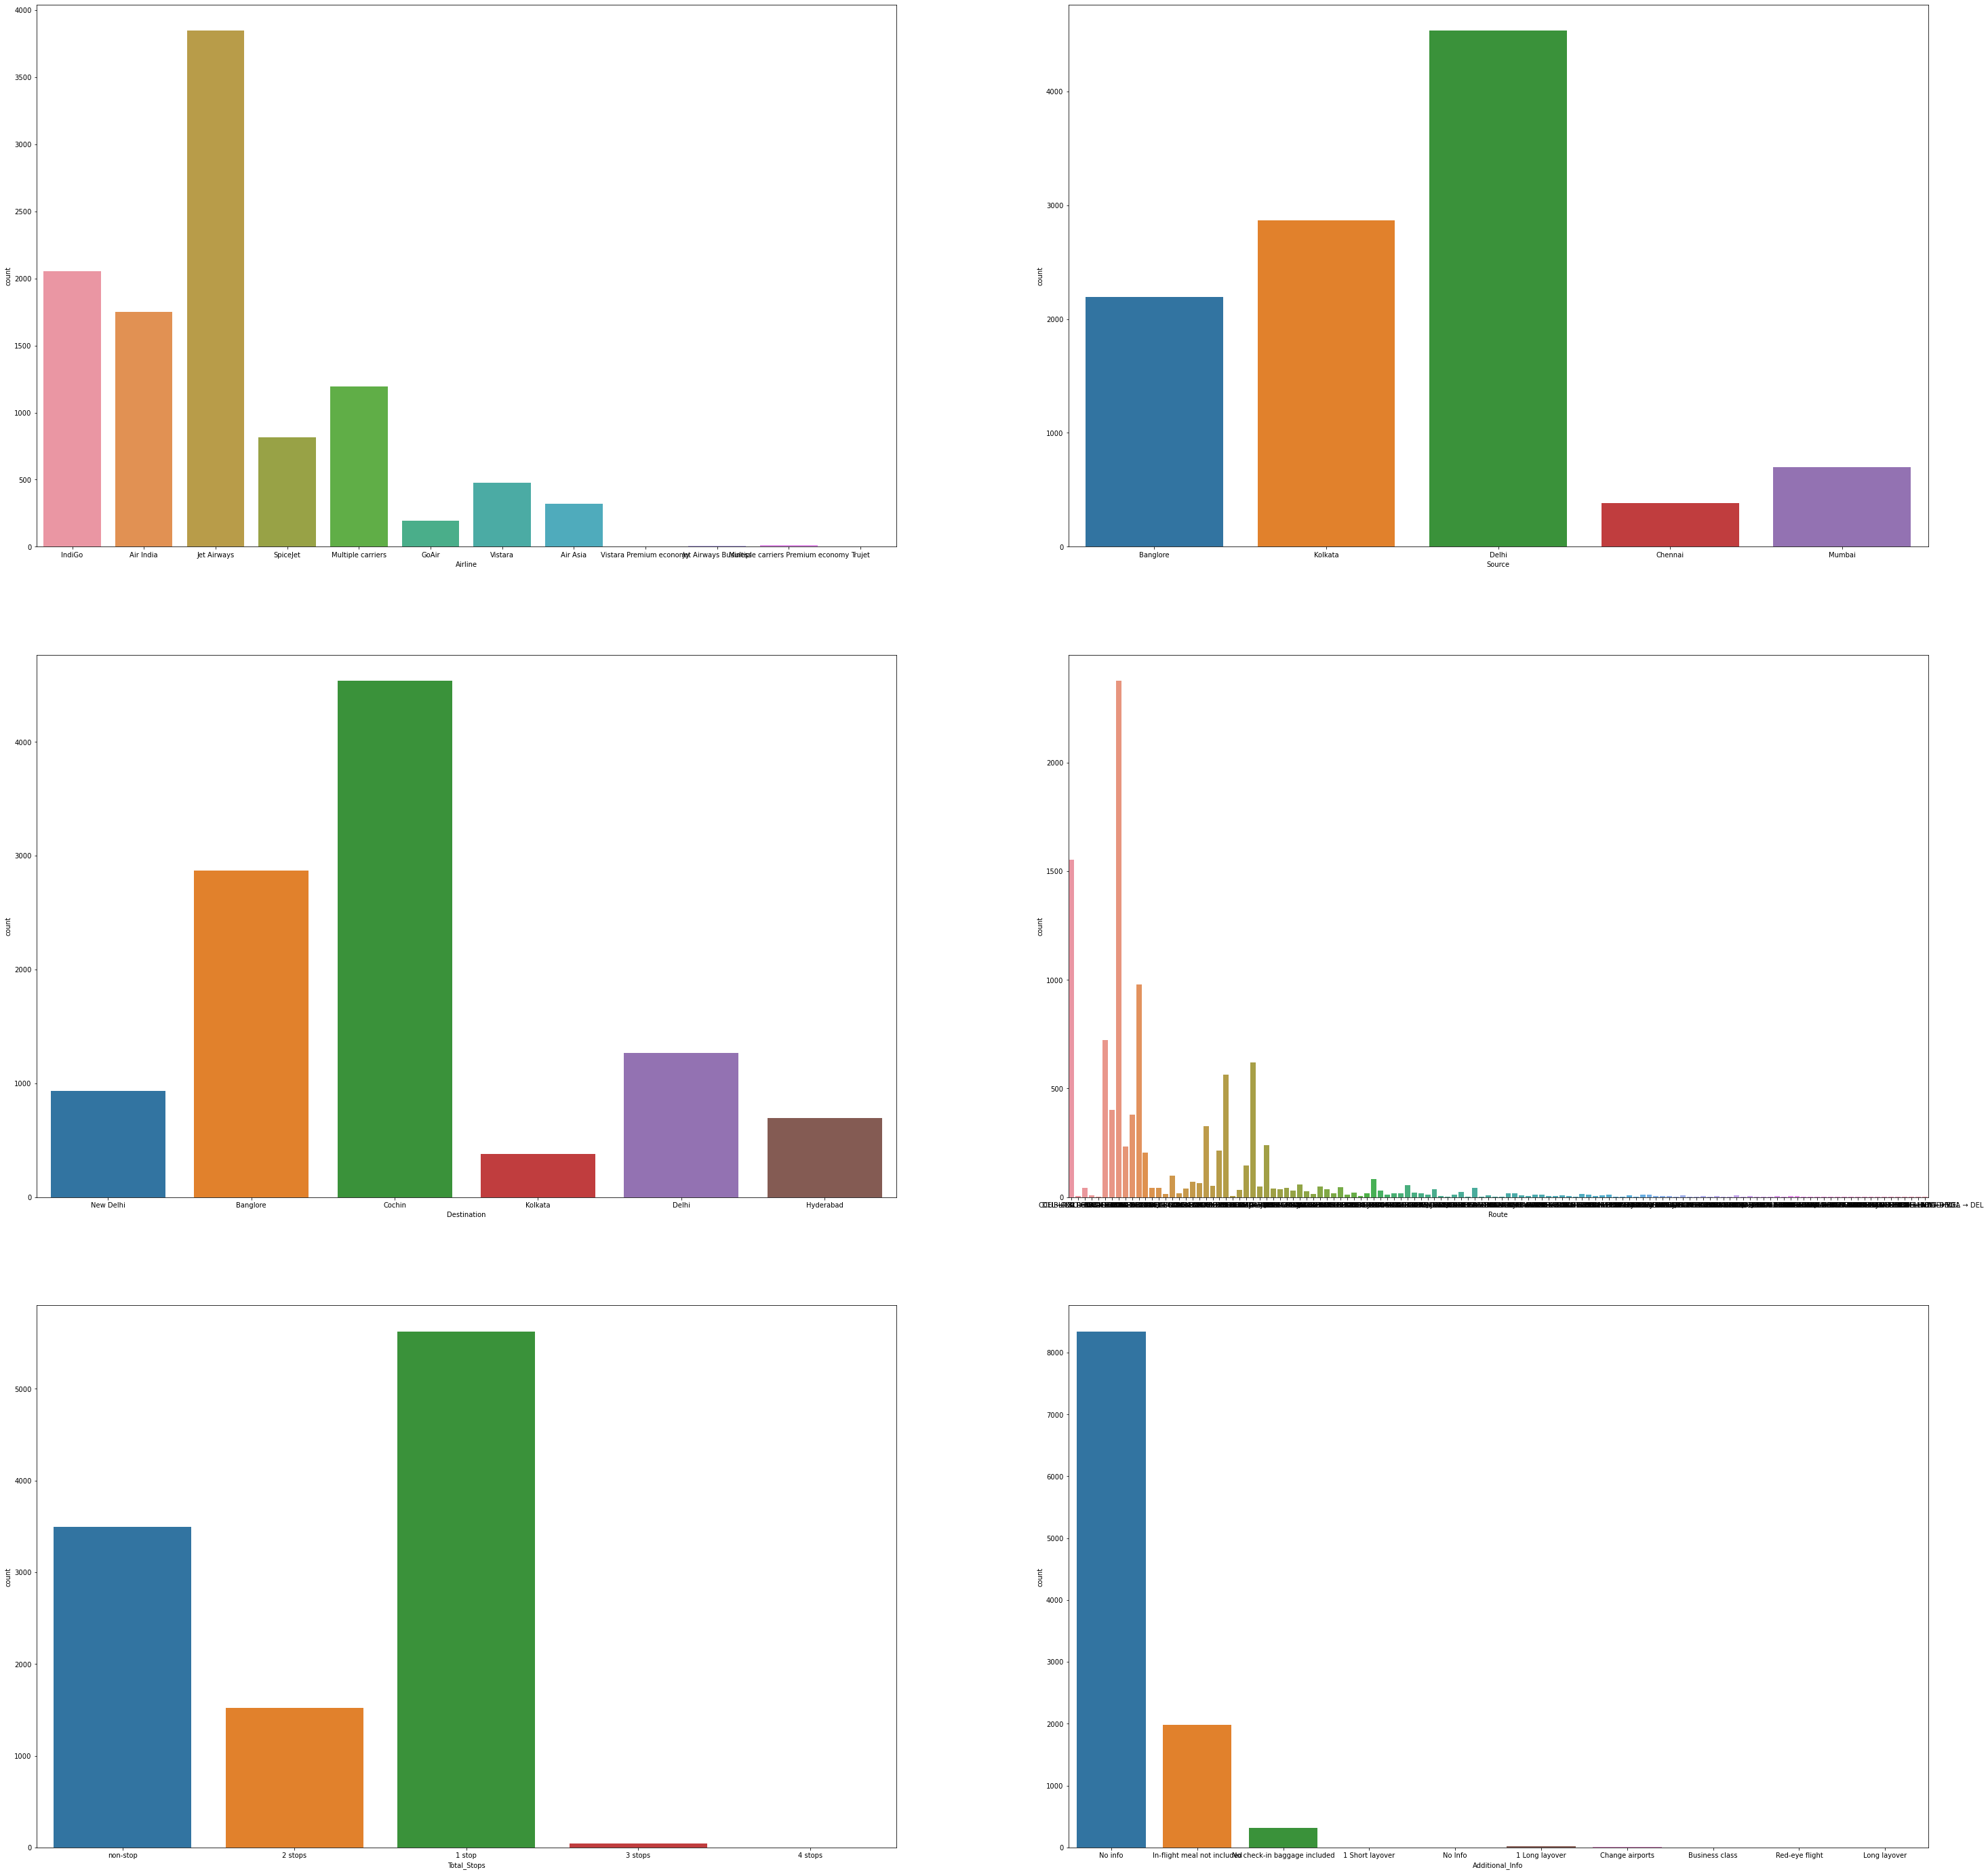

In [41]:
plt.subplots(figsize=(50,50))
plotnumber=1

for i in cat:
    if plotnumber<=10:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(df[i])
    plotnumber+=1
plt.show()

OBSERVATION:
#Jet airways is highest operationg flight category
    
#most of the operation Source is in Kolkata followed by delhi and Banglore
    
#Most of the Destination Source is to cochin followed by Banglore
    
#Most of them prefer to take 1 stop as preference followed by Non_stop
    
#We consider People prefer economical as there is no additional inflo also    most prefer In_flight me not required 
    
    
    

In [142]:
plt.subplots(figsize=(200,100))
sns.countplot(df['Route'])

<AxesSubplot:xlabel='Route', ylabel='count'>

most people prefer i stop preferences in route i.e to reach delhi from blr thy prfer to take a route of blr to bom to del

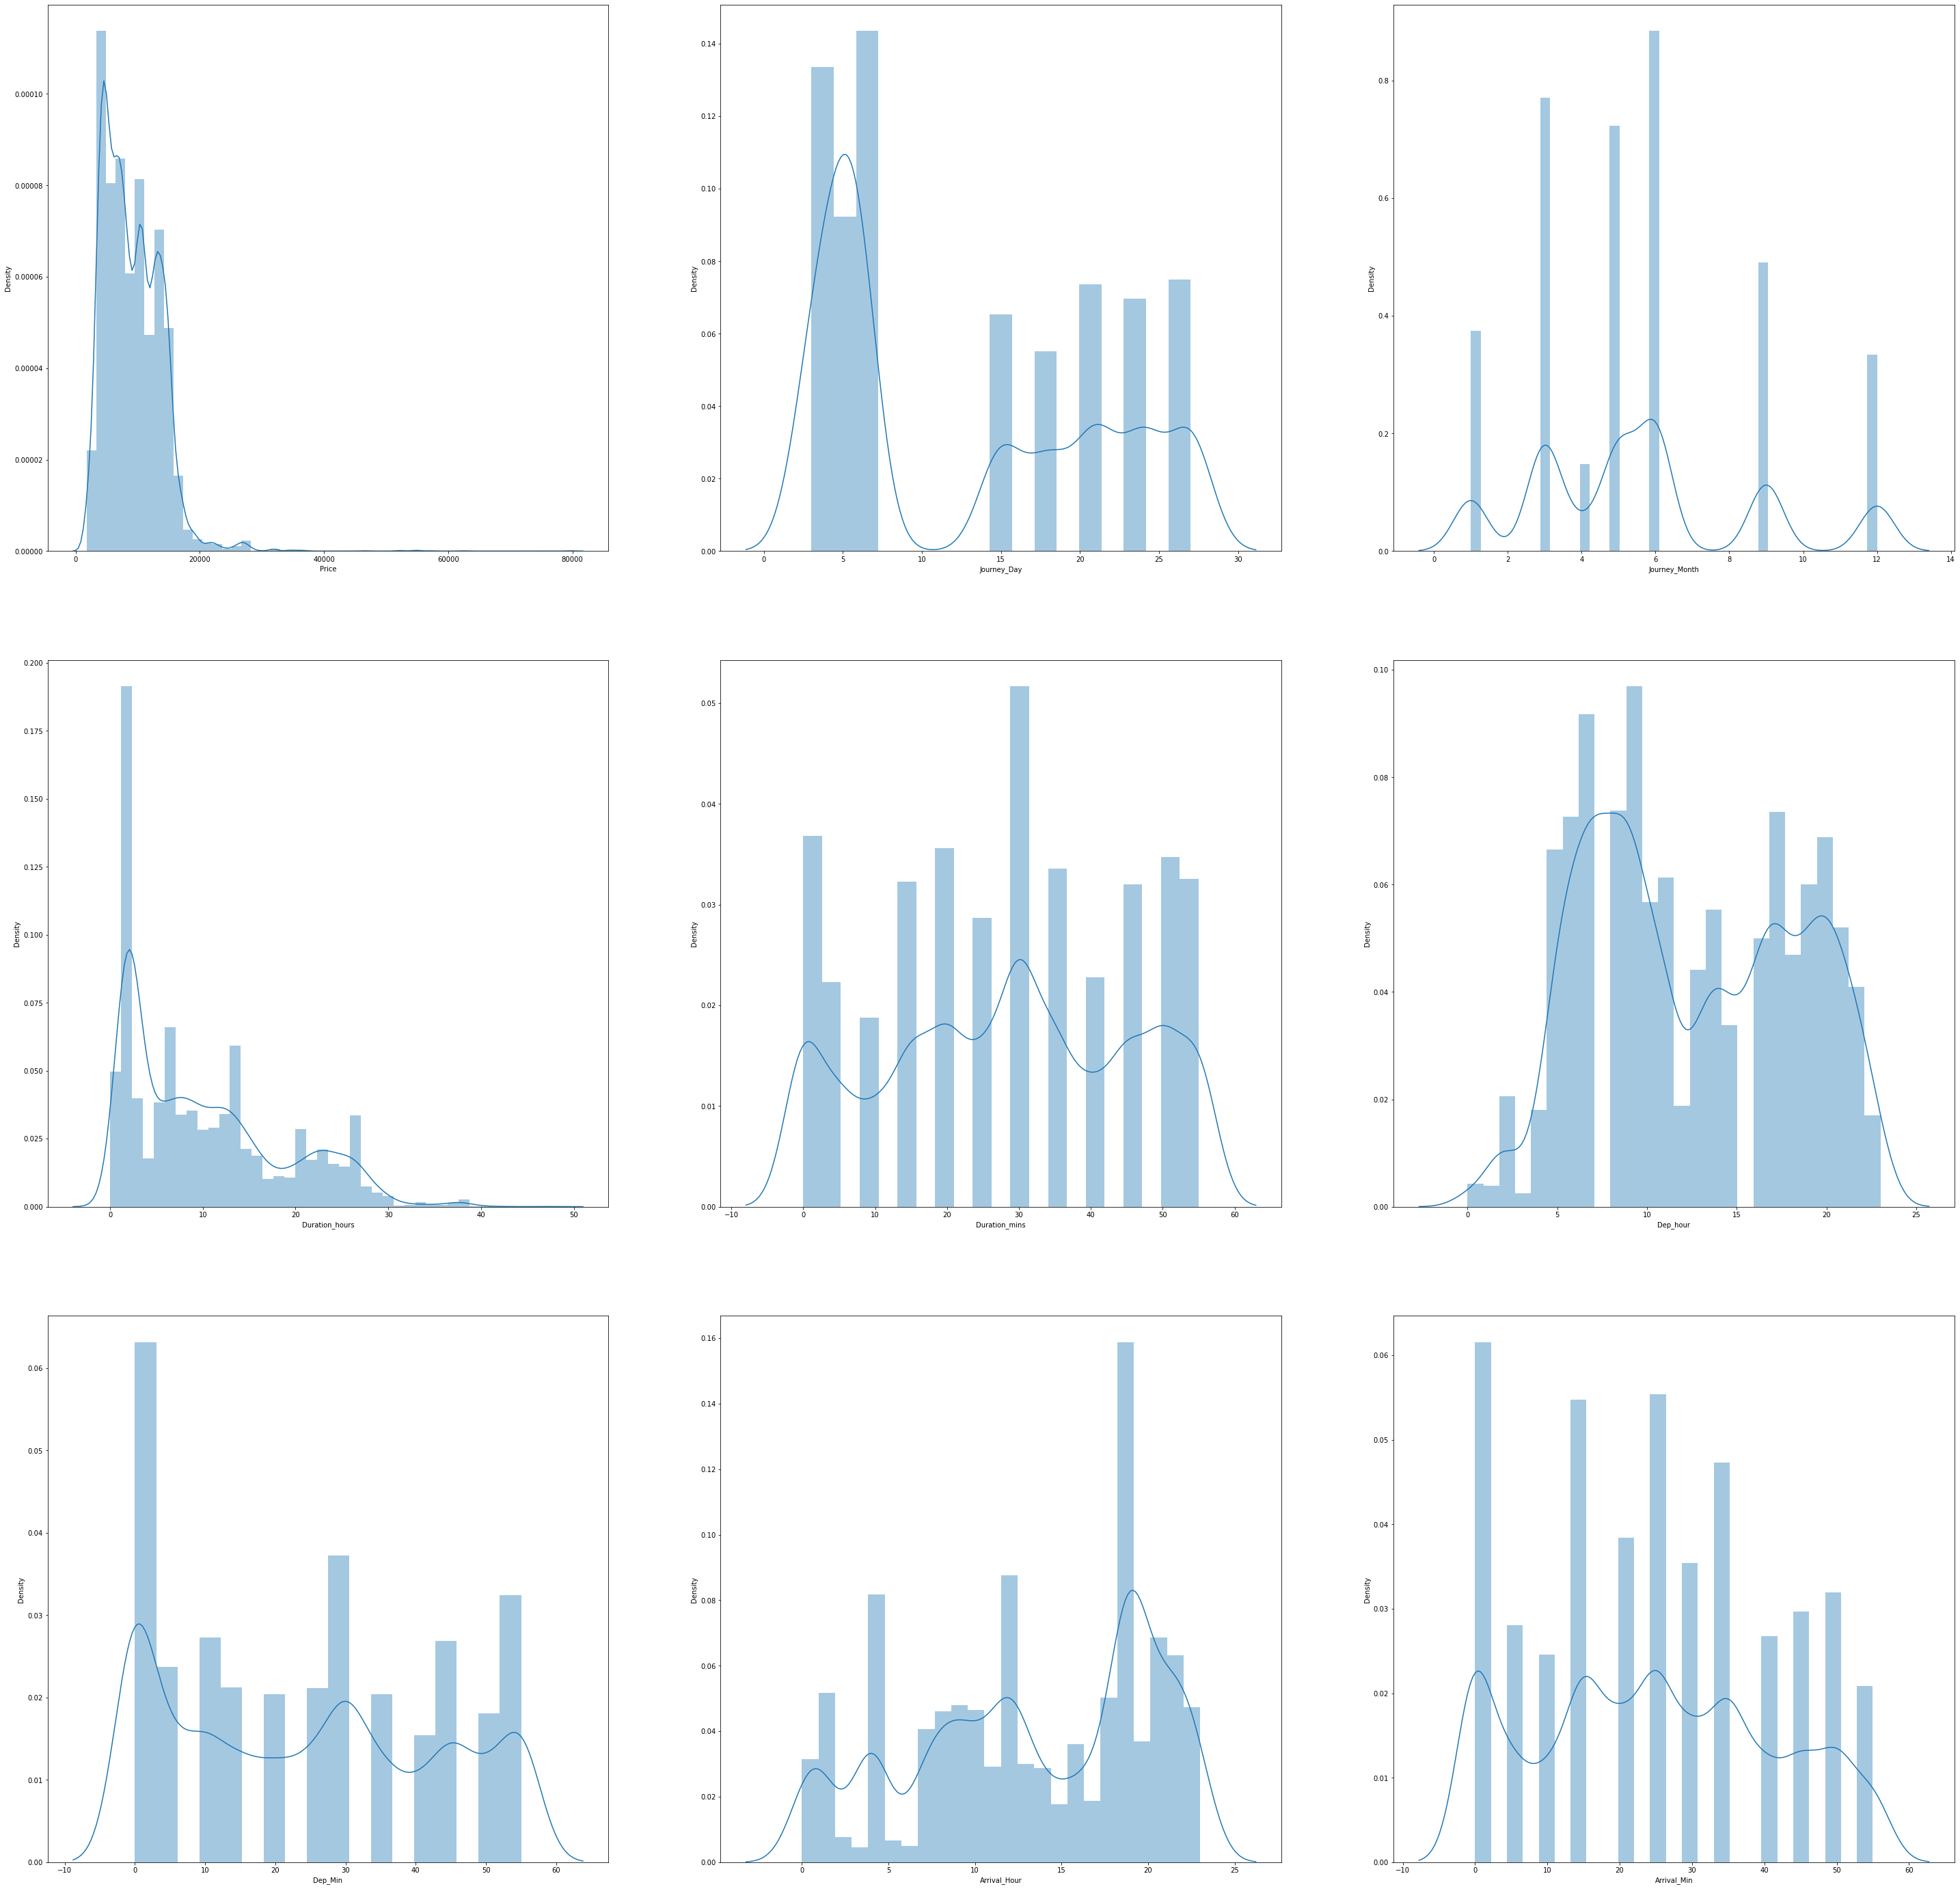

In [42]:
plt.subplots(figsize=(50,50))
plotnumber=1

for i in num:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
    plotnumber+=1
plt.show()

From the distribution plot we can observe the data is not normally distributed in some columns and some columns are almost normal but have no proper well shape curve.
The Journey_Month, Duration_hours and Price columns are skewed to right as the mean is more than the median in those columns.

# BIVARIENT ANAYSIS:

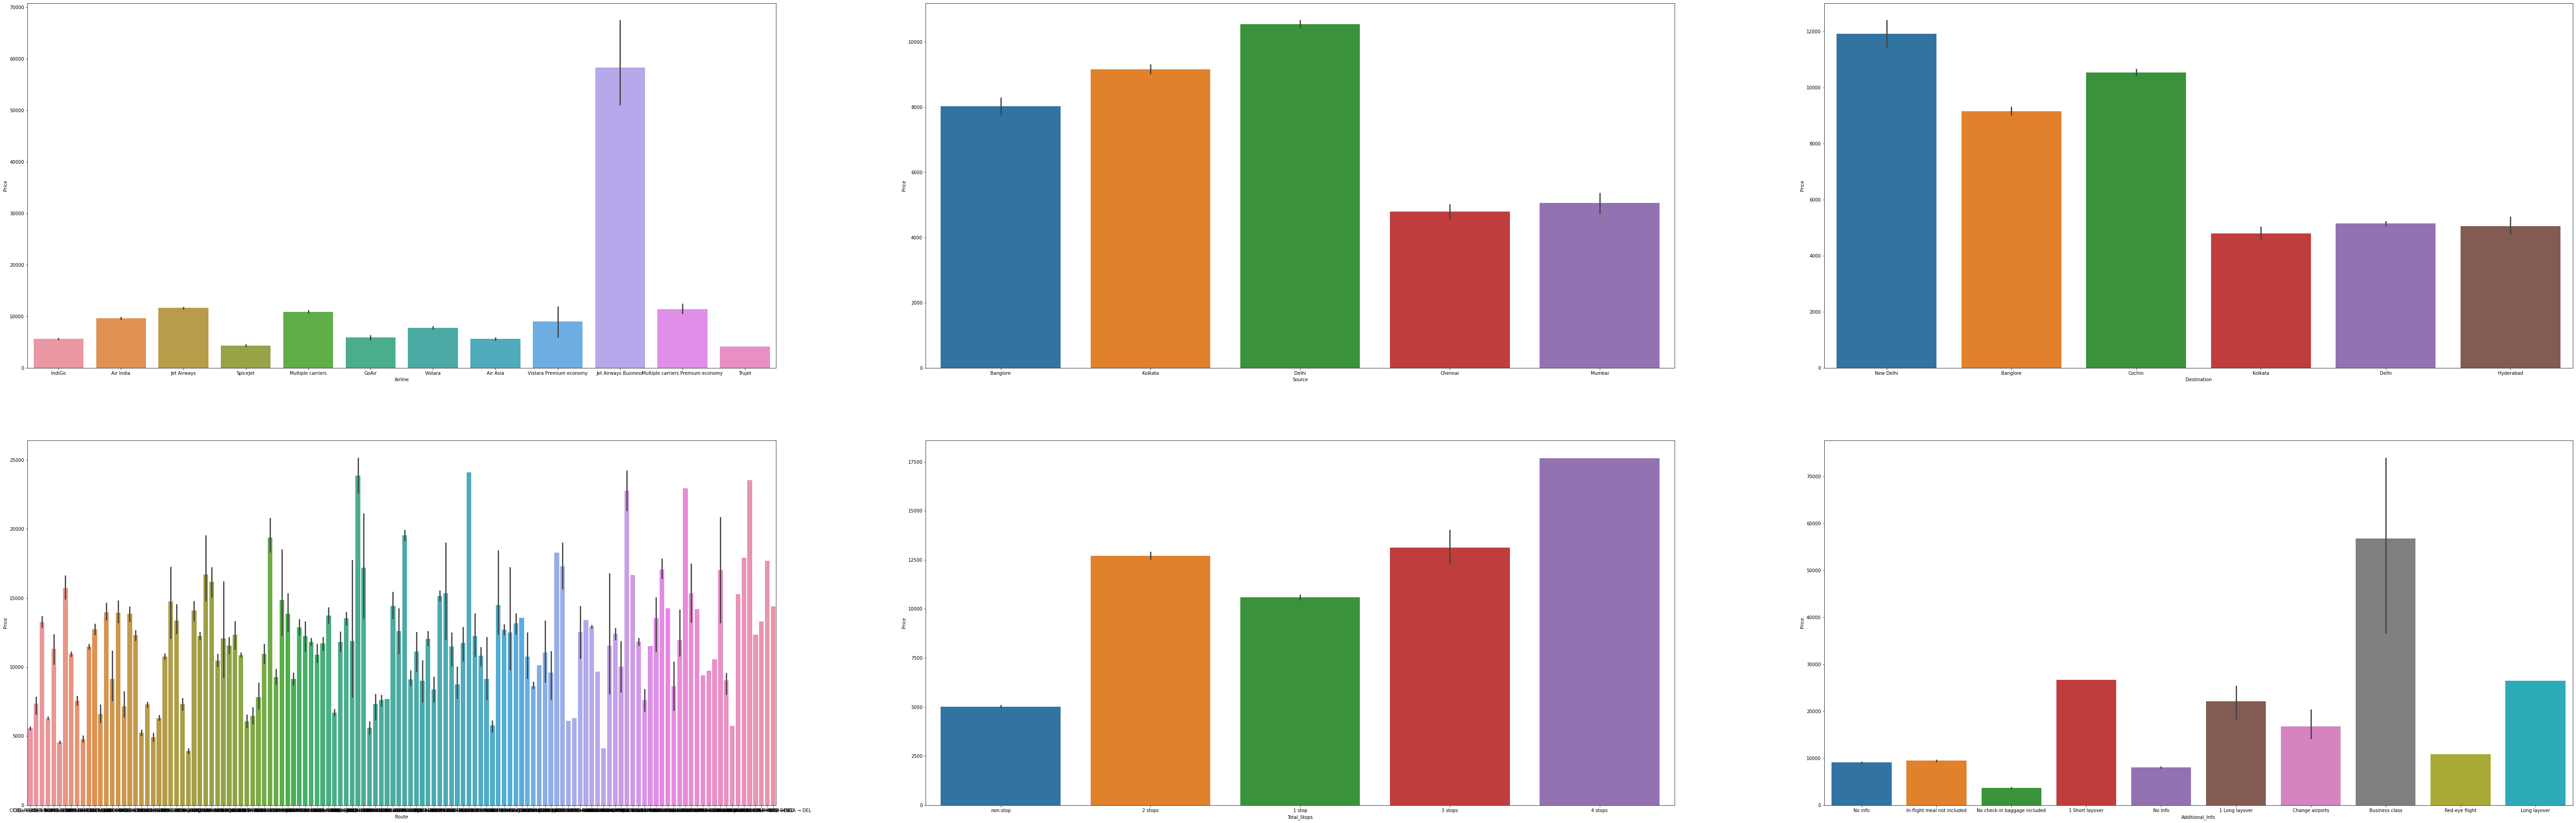

In [43]:
plt.subplots(figsize=(100,50))
plotnumber=1

for i in cat:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x=df[i],y=df['Price'],data=df)
    plotnumber+=1
plt.show()

*The Price f Jet airways price is higher followed by Air india and carriers Premium

*The Spicejet and Truejet have low premium fare 

*The source fom delhi has high fare followed by kolkata and Banglore

*The destination to delhi has high fare followed by Cochin and Banglore

*The price of 4 stops is higher

*The price is lower for nonstop and 1 stop airlines

*The price is lower for No Checking Baggage Included and  No info.




# Summary of univarient And Bivarient

*People prefer economical as majority of the one used to prefer 1 stop as preference

*The sourcce and Destination of Delhi is higher hence there bis a huge demand and supply of airline tickets from and to delhi

*As its a Domestic Travel People prefer not to take baggage and no info available 

*The destination source from kolkata is higher so inorder to reduce the cost people can take flight from other states 

*People can prefer kolkata only for the detination not as a source .

*The vice versa for cochin compared to kolkata

*The Banglore has median range of price for preferences 

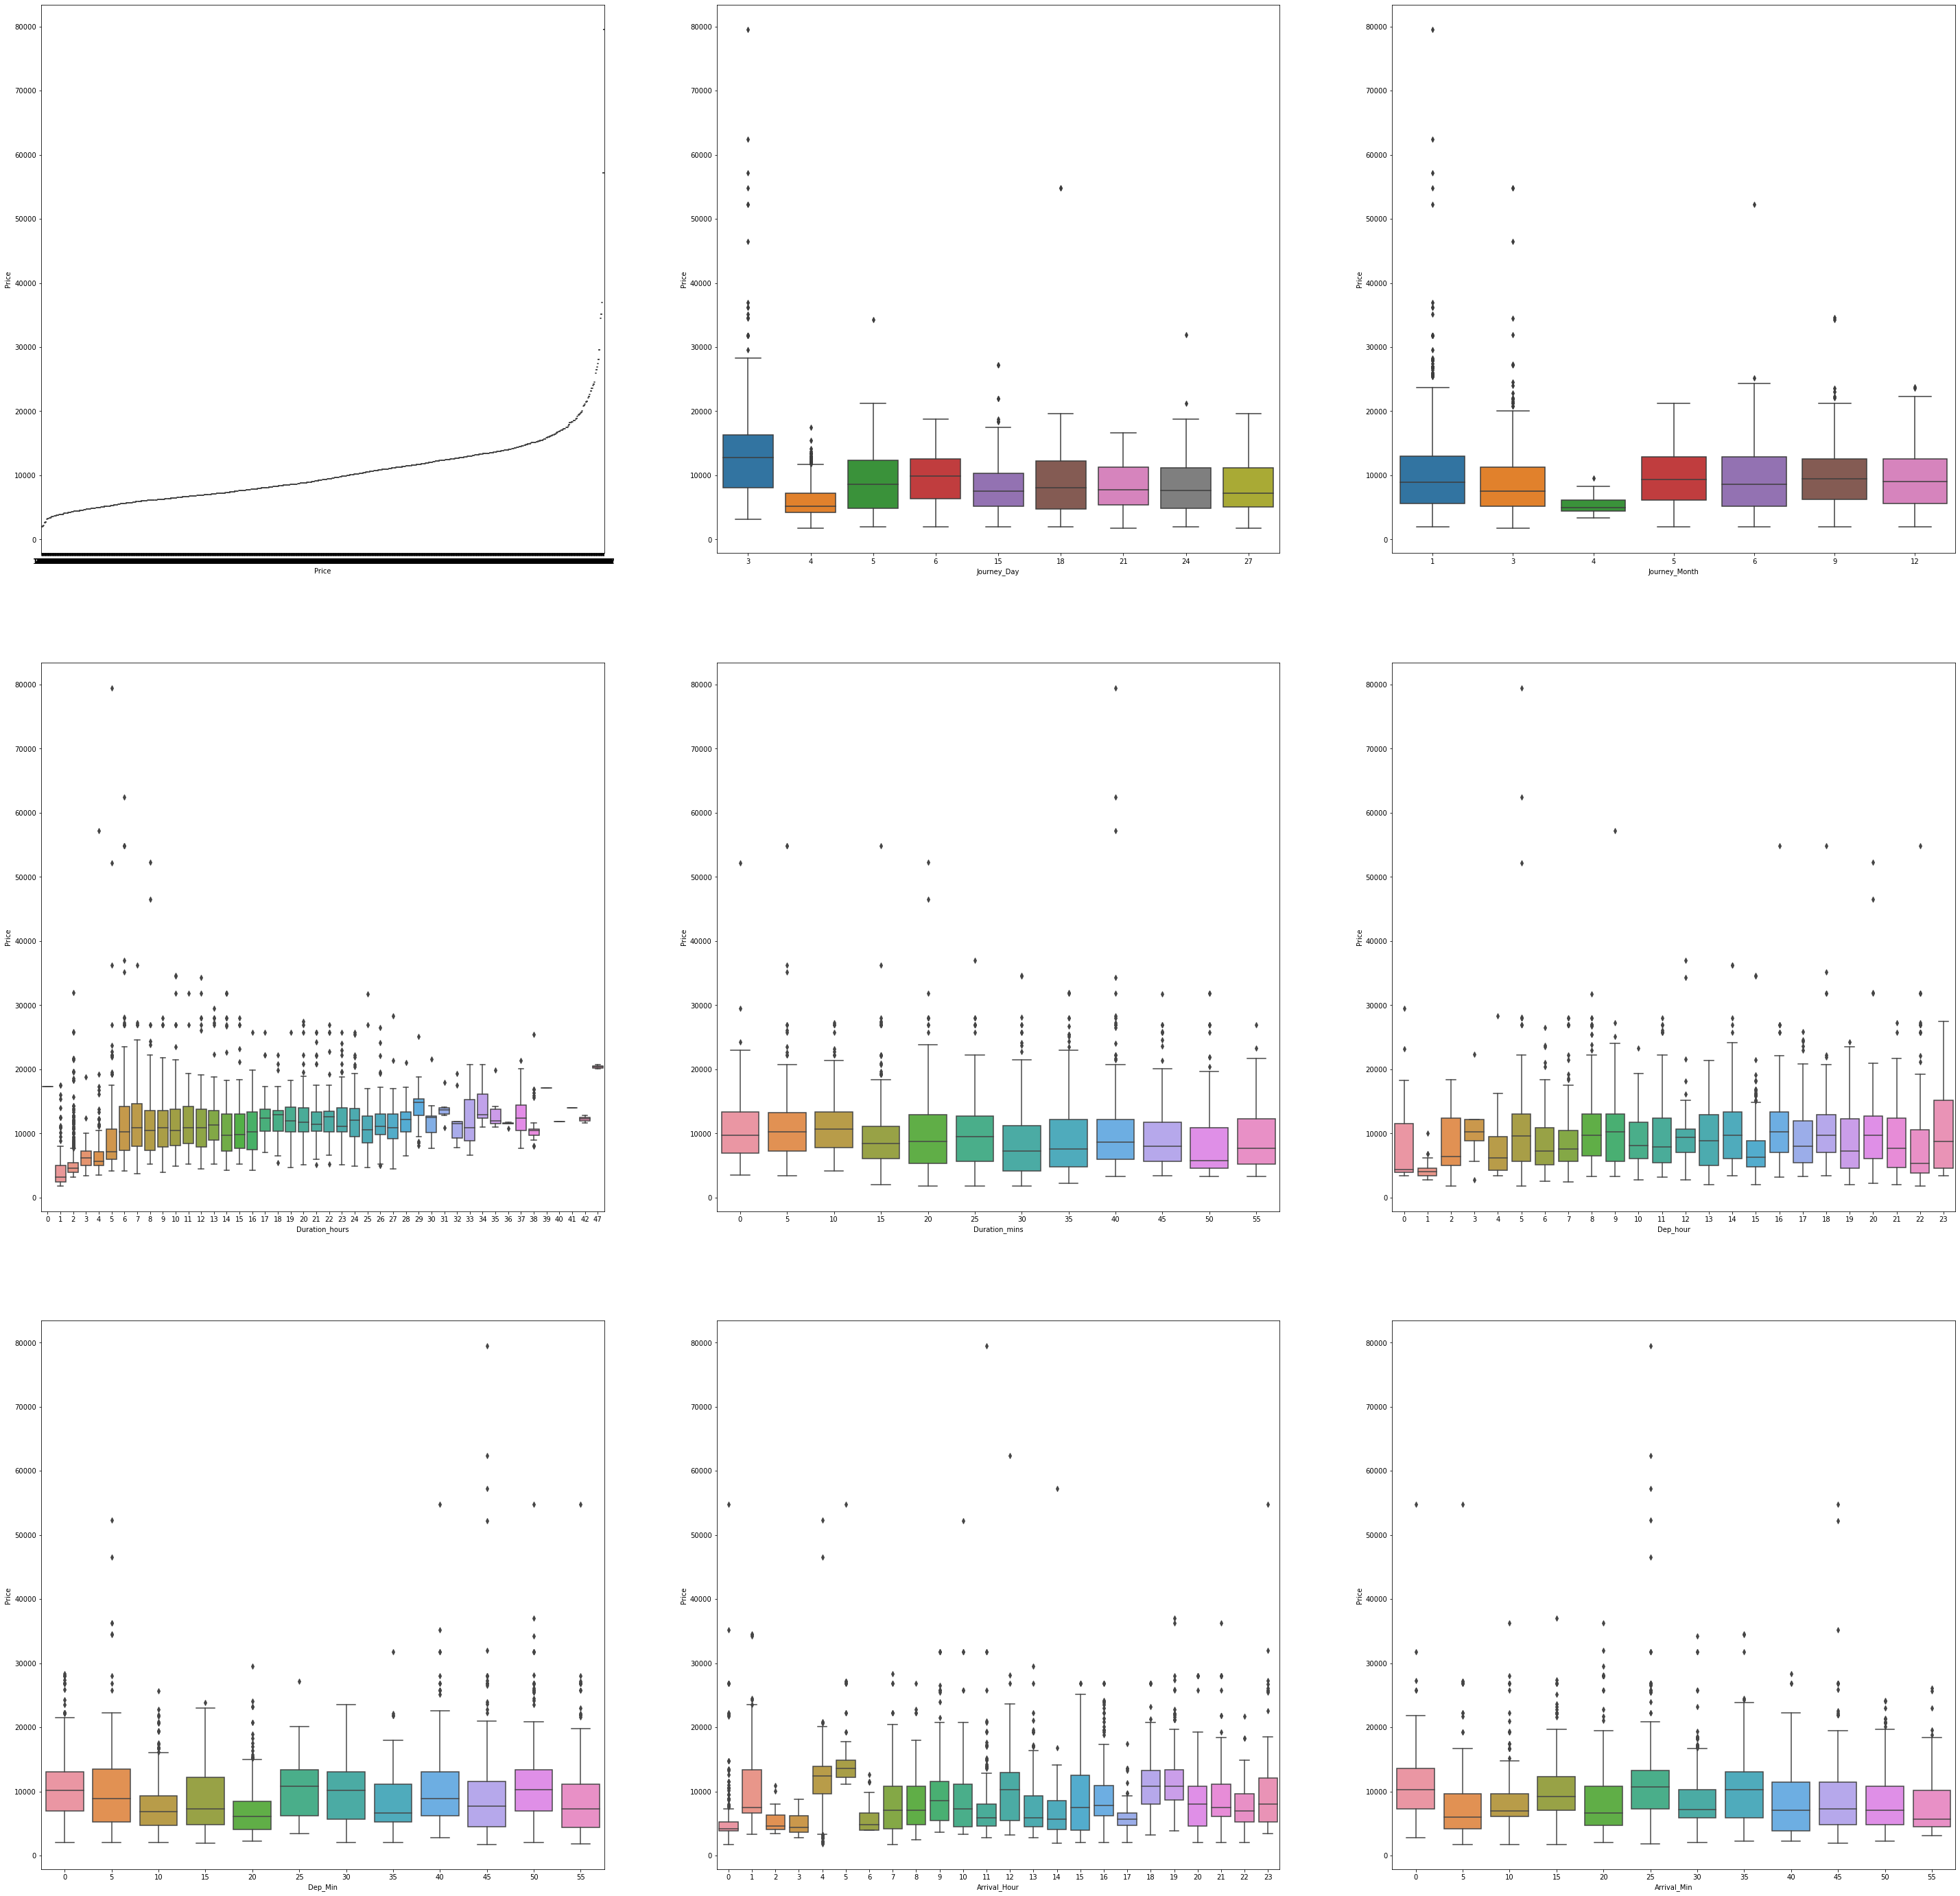

In [47]:
plt.subplots(figsize=(50,50))
plotnumber=1

for i in num:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df[i],y=df['Price'],data=df)
    plotnumber+=1
plt.show()

OBSERVATION:
While comparing Journey_Day and Price we can see the price of ticket is high in day 3 apart from this there is no much impact of day on ticket price

While comparing Journey_Month and Price it can be inferred that the flights travelling in the January month are more expensive than others and the flights travelling in April month have very cheap ticket prices.

There in no significance relation between Dep_Min and Price of the tickets

In the fourth graph also we can say there is no much impact of Duration_mins on Price. But we can say duration minutes 10 and 5 have bit high prices compared to others.

We can observe there is no much significance differences in any of the classes with the Price

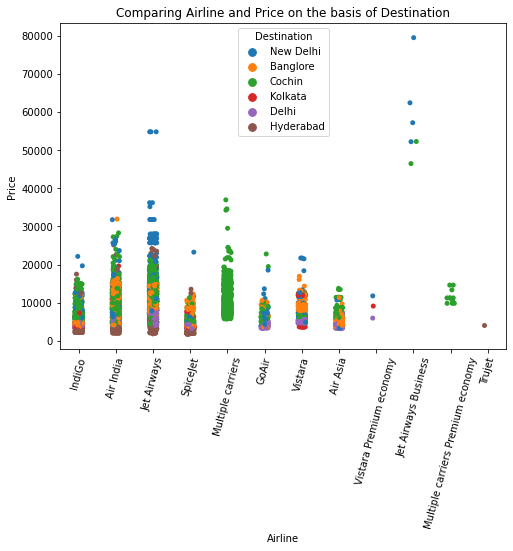

In [49]:
# checking how the price pays role in Airline on the basis of destination
plt.figure(figsize=(8,6))
sns.stripplot(x=df['Airline'],y=df['Price'],hue=df['Destination'])
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=75)
plt.show()

Here we can conclude that the Jet Airways flights that are destined to Delhi are have more expensive ticket prices compared to others

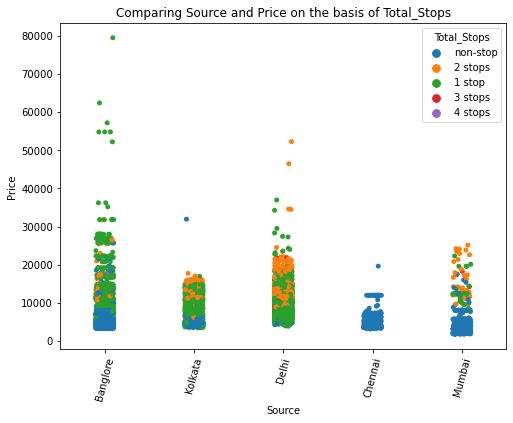

In [50]:
# checking how the price pays role in Source on the basis of Total_Stops
plt.figure(figsize=(8,6))
sns.stripplot(x=df['Source'],y=df['Price'],hue=df['Total_Stops'])
plt.title("Comparing Source and Price on the basis of Total_Stops")
plt.xticks(rotation=75)
plt.show()

As we can notice that the flights in the Banglore source which have only one stop between source and destination have very expensive ticket price and the flights in Chennai with no stops have very cheap prices compared to other source flights.

# MULTIVARIENT ANALYSIS

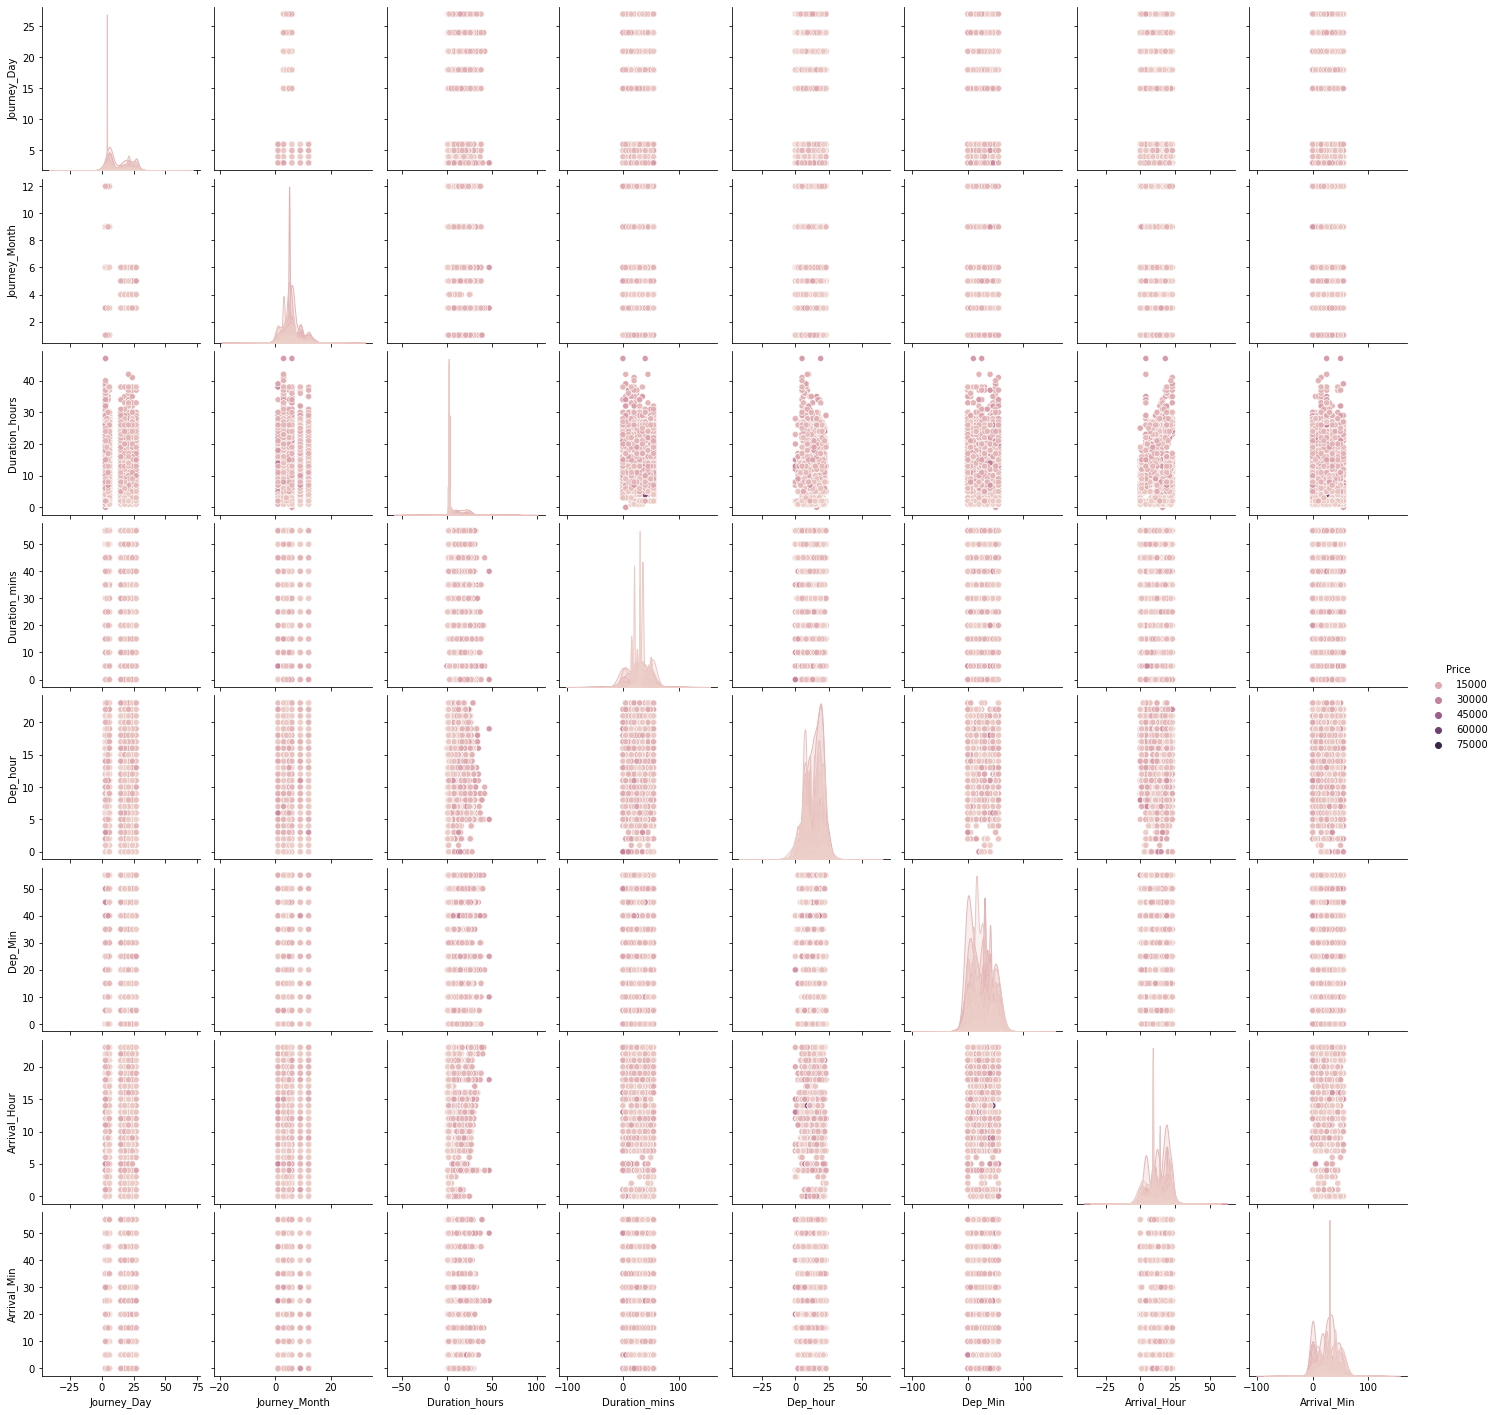

In [52]:
sns.pairplot(df,hue="Price")
plt.show()

# OUTLIERS

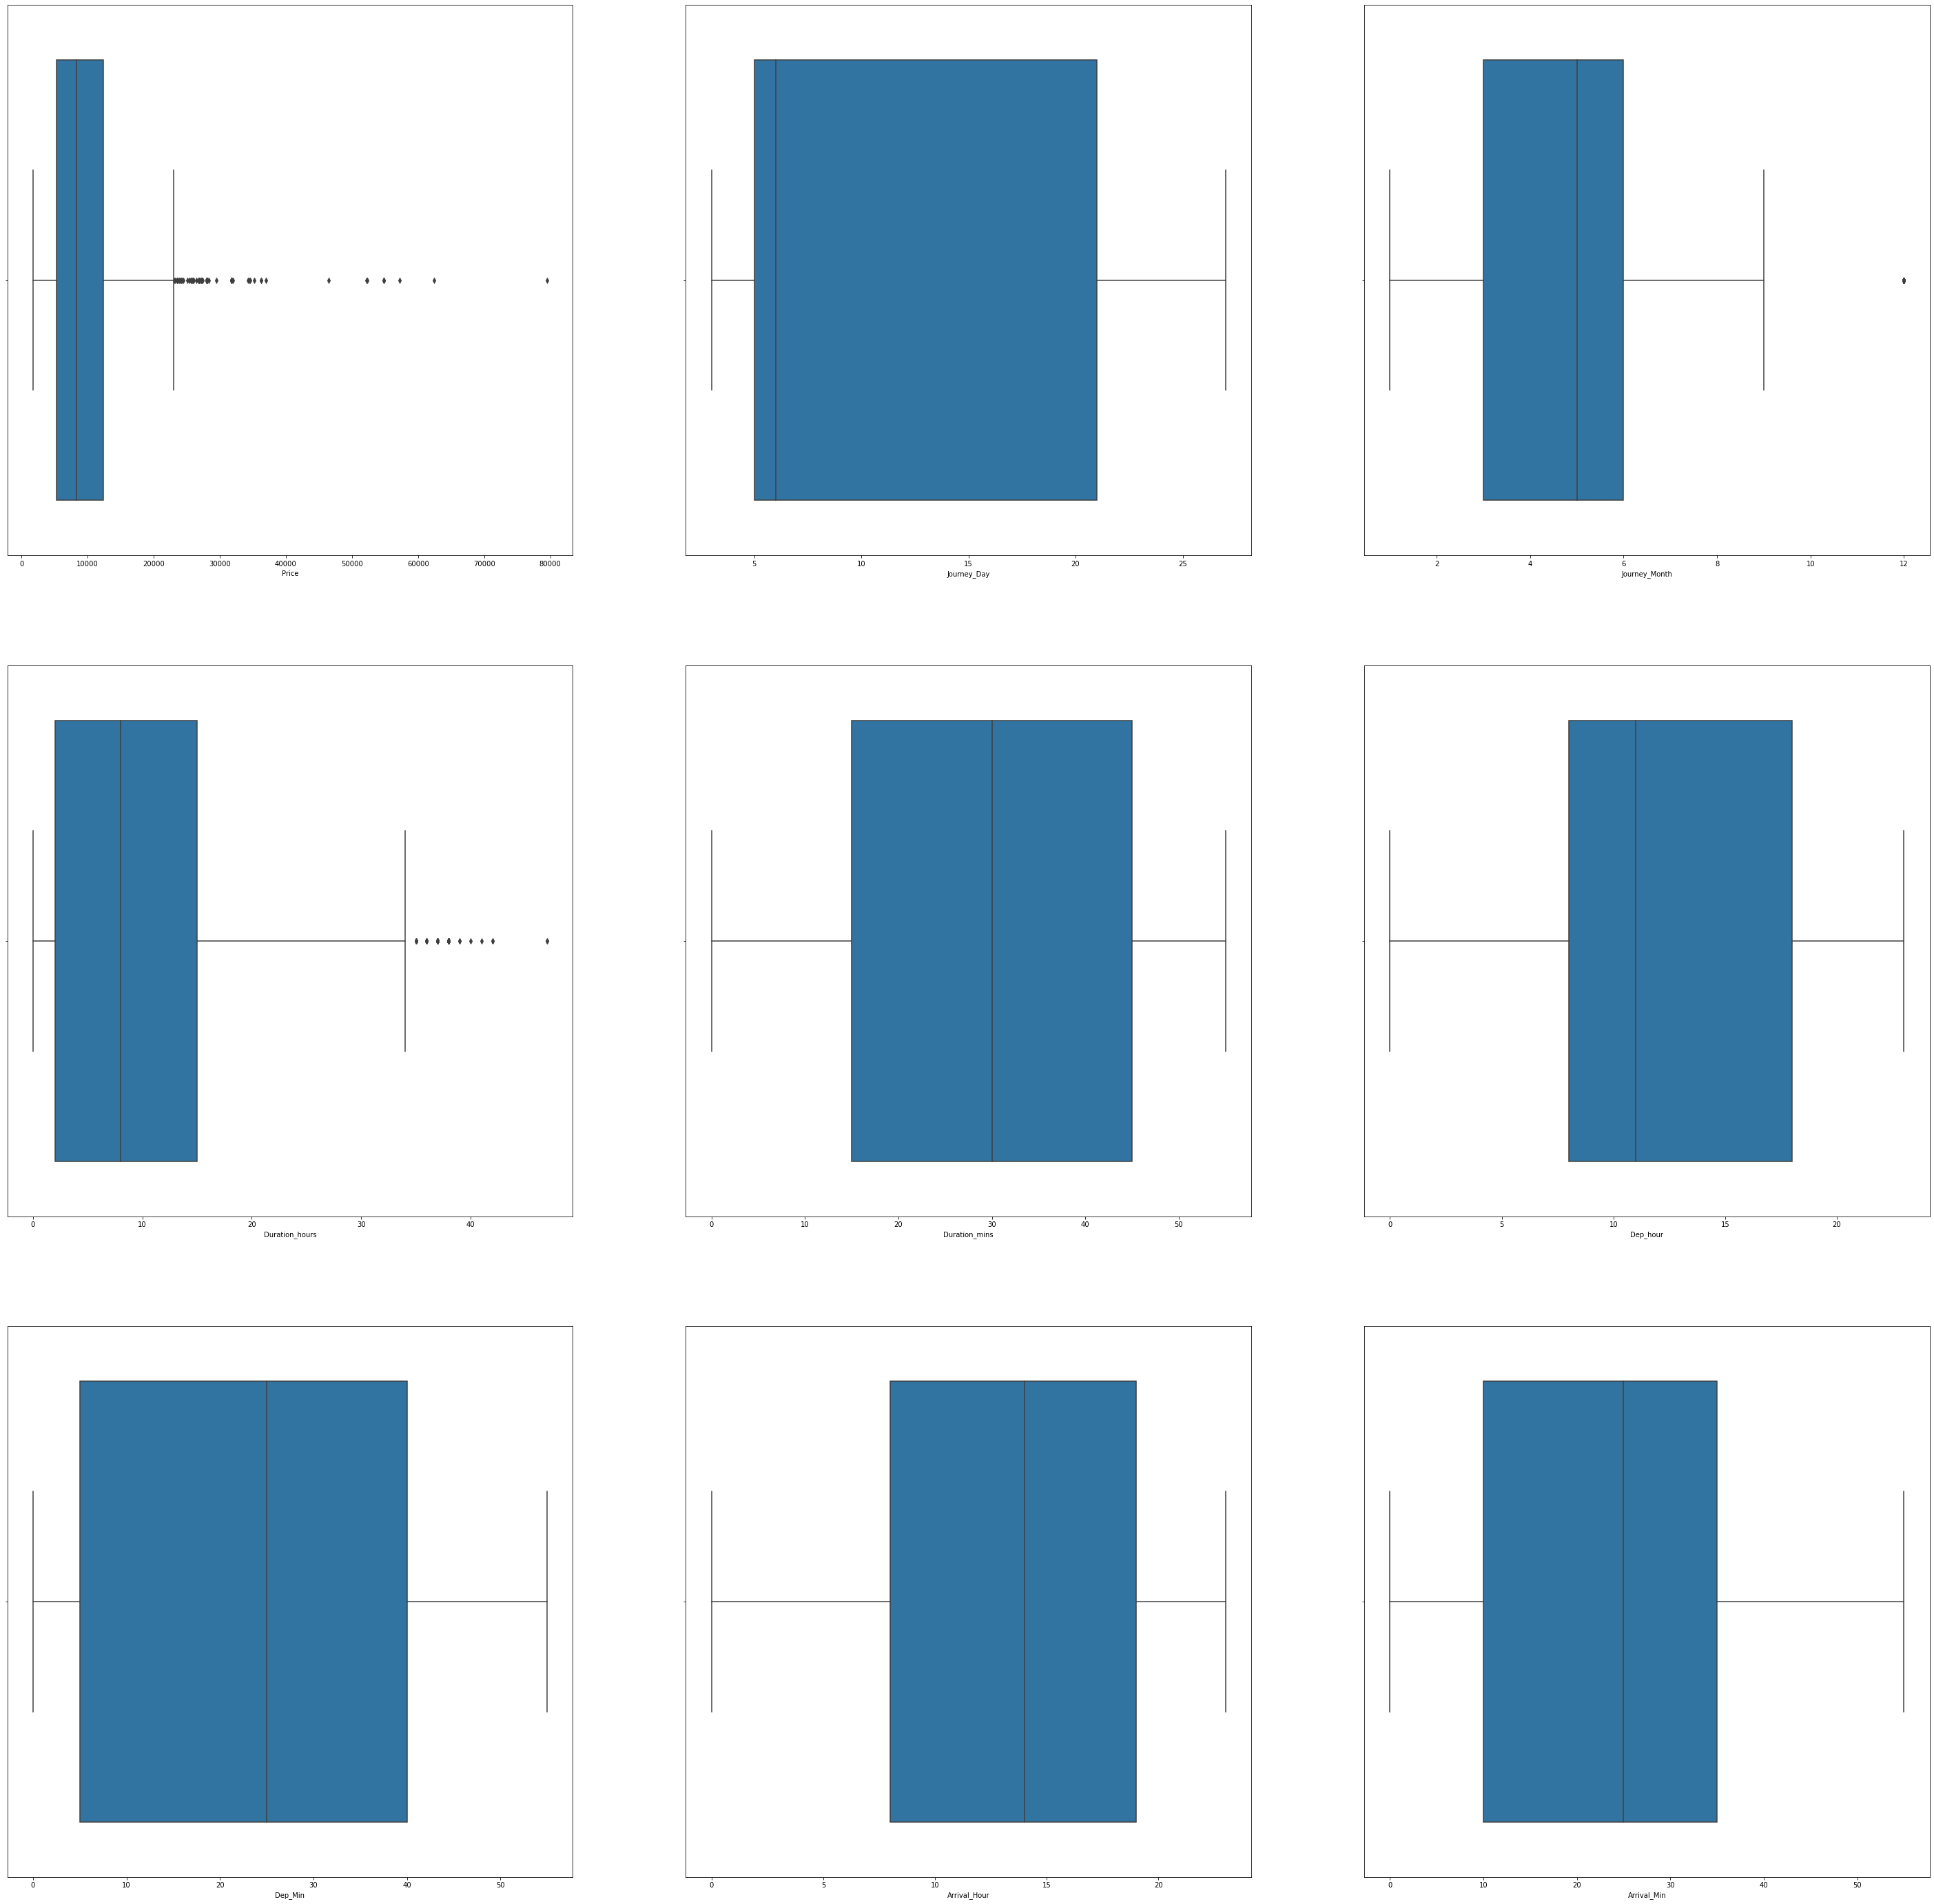

In [53]:
# Identifying the outliers using boxplot
plt.subplots(figsize=(50,50))
plotnumber=1

for i in num:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df[i])
    plotnumber+=1
plt.show()



The outliers present in Price, Journey_Month and Duration_hour

Since Price is our target column so no need to remove outliers in this two columns

And remaining two columns Duration_hours and Journey_Month are numerical so we can remove outliers in these columns using ZSCORE 

# ZSCORE

In [54]:
from scipy.stats import zscore

In [57]:
score=df[['Duration_hours','Journey_Month']]

z=np.abs(zscore(score))
z

,Duration_hours,Journey_Month
0,0.970698,0.848503
1,0.382117,1.517993
2,1.030476,1.159966
3,0.617549,2.164201
4,0.735265,1.517993
...,...,...
10678,0.970698,1.159966
10679,0.970698,0.513758
10680,0.852981,0.513758
10681,0.970698,1.517993


In [58]:
new_df = df[(z<3).all(axis=1)]
new_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,3,0,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,2,40,11,30,14,10


In [59]:
df.shape

(10683, 15)

In [60]:
new_df.shape

(10617, 15)

In [61]:
(10683-10617)/10683*100

0.6178039876439202

Here The DataLoss in Very Minimal will proceed further

# SKEWNESS CHECKING & HANDLING

In [62]:
new_df.skew()

Price             1.824502
Journey_Day       0.367029
Journey_Month     0.628224
Duration_hours    0.761022
Duration_mins    -0.097354
Dep_hour          0.103798
Dep_Min           0.164551
Arrival_Hour     -0.361250
Arrival_Min       0.107805
dtype: float64

We can find the columns Price, Journey_Month, Duration_hours have skewness but will remove skewness in Duration_hours and Journey_Months as they are numerical columns.

The column Price is our target so no need to remove skewness in this column.

In [63]:
new_df["Duration_hours"] = np.sqrt(new_df["Duration_hours"])
new_df["Journey_Month"] = np.sqrt(new_df["Journey_Month"])

In [64]:
new_df.skew()

Price             1.824502
Journey_Day       0.367029
Journey_Month    -0.073187
Duration_hours    0.256836
Duration_mins    -0.097354
Dep_hour          0.103798
Dep_Min           0.164551
Arrival_Hour     -0.361250
Arrival_Min       0.107805
dtype: float64

The Skewness Has beed Removed Successfully

# ENCODING

Now We have to handle the Object Dtype so im using label Encoder for further processing

In [67]:
from sklearn.preprocessing import LabelEncoder

In [70]:
Le=LabelEncoder()

In [75]:
new_df[cat]=new_df[cat].apply(Le.fit_transform)

In [76]:
new_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,18,4,8,3897,24,1.732051,1.414214,50,22,20,1,10
1,1,3,0,84,1,8,7662,5,1.000000,2.645751,25,5,50,13,15
2,4,2,1,118,1,8,13882,6,3.000000,4.358899,0,9,25,4,25
3,3,3,0,91,0,8,6218,5,3.464102,2.236068,25,18,5,23,30
4,3,0,5,29,0,8,13302,3,1.000000,2.000000,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,8,4107,4,3.000000,1.414214,30,19,55,22,25
10679,1,3,0,64,4,8,4145,27,2.000000,1.414214,35,20,45,23,20
10680,4,0,2,18,4,8,7229,27,2.000000,1.732051,0,8,20,11,20
10681,10,0,5,18,4,8,12648,3,1.000000,1.414214,40,11,30,14,10


Now our values are encoded

# Feature corr with Target

<AxesSubplot:>

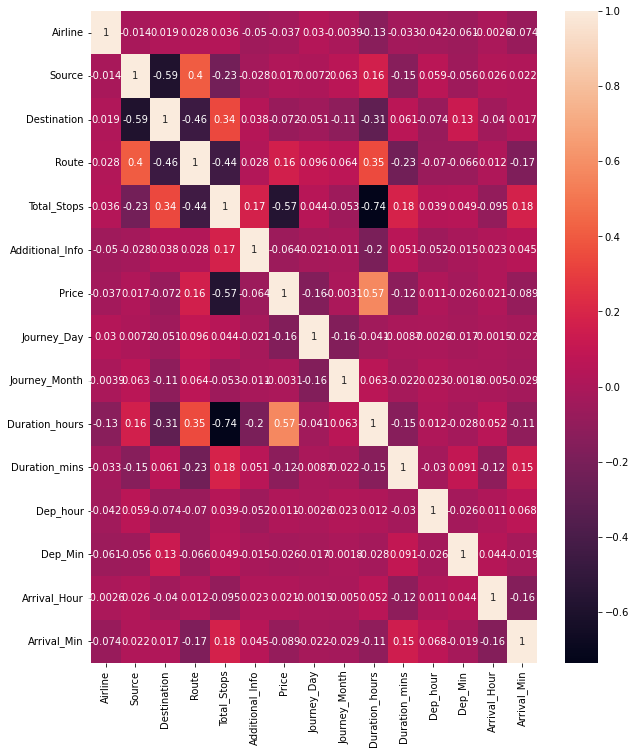

In [79]:
plt.subplots(figsize=(10,12))
sns.heatmap(new_df.corr(),annot=True)

This heat map contains both positive and negative correlation.

The feature Duration_hours is highly positively correlated with the target variable Price

The feature Total_Stops is highly Negatively correlated with the label

The features Duration_ours and Total_Stops, Duration_hours and Destination are highly negative correlated with each other . 

This may lead to multicollinearity problem so we will check the VIF value to solve this, if we get the features having VIF more 
than 10 then we can drop those columns.

# Seperating Target and Features

In [81]:
x=new_df.drop("Price", axis=1)
y=new_df["Price"]

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.416258,-1.655042,2.413090,-1.544003,1.402360,0.50064,1.286176,-0.803902,-1.110824,1.274299,1.649475,-0.235894,-1.794784,-0.889208
1,-1.266881,0.888124,-0.972992,0.254498,-0.253797,0.50064,-0.873920,-1.918732,-0.180465,-0.201145,-1.312186,1.362715,-0.046050,-0.586465
2,0.009053,0.040402,-0.295776,1.180998,-0.253797,0.50064,-0.760231,1.127040,1.113724,-1.676590,-0.615325,0.030541,-1.357601,0.019019
3,-0.416258,0.888124,-0.972992,0.445248,-0.805850,0.50064,-0.873920,1.833814,-0.489958,-0.201145,0.952614,-1.035199,1.411228,0.321762
4,-0.416258,-1.655042,2.413090,-1.244253,-0.805850,0.50064,-1.101299,-1.918732,-0.668295,0.979210,0.604183,1.362715,1.119772,0.624504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-1.692192,0.888124,-0.972992,-0.290502,1.402360,0.50064,-0.987609,1.127040,-1.110824,0.093944,1.126829,1.629150,1.265500,0.019019
10613,-1.266881,0.888124,-0.972992,-0.290502,1.402360,0.50064,1.627244,-0.395846,-1.110824,0.389033,1.301044,1.096280,1.411228,-0.283723
10614,0.009053,-1.655042,0.381441,-1.544003,1.402360,0.50064,1.627244,-0.395846,-0.870716,-1.676590,-0.789540,-0.235894,-0.337506,-0.283723
10615,2.560922,-1.655042,2.413090,-1.544003,1.402360,0.50064,-1.101299,-1.918732,-1.110824,0.684121,-0.266894,0.296976,0.099677,-0.889208


# VIF

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.049311,Airline
1,1.645242,Source
2,1.842599,Destination
3,1.630904,Route
4,2.488248,Total_Stops
5,1.077033,Additional_Info
6,1.057236,Journey_Day
7,1.047315,Journey_Month
8,2.319197,Duration_hours
9,1.121669,Duration_mins


We could that there is no multicolinearity problem exists so we will proceed further to build our model

# MODEL BUILDING

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=50)

# ALGORITHEMS

In [86]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

R2_Score: 0.8962371624708702
MAE: 656.6411522608835
MSE: 2029195.160425959
RMSE: 1424.498213556605


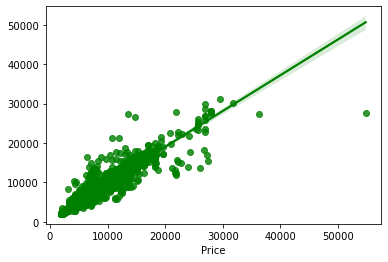

In [87]:
# checking R2 score for Random Forest Regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

# visualizing the predicted values
sns.regplot(y_test,predRFR,color='g')
plt.show()

R2_Score: 0.8292357815632423
MAE: 726.0431052521448
MSE: 3339480.0477436003
RMSE: 1827.4244301047308


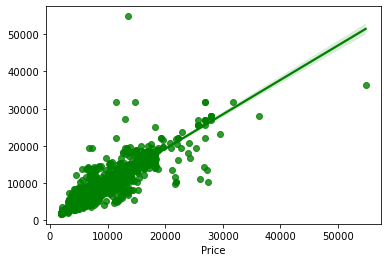

In [88]:
# checking R2 score for Decision Tree Regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# visualizing the predicted values
sns.regplot(y_test,predDTR,color='g')
plt.show()

R2_Score: 0.8360476739794842
MAE: 1215.5839946636172
MSE: 3206266.081611459
RMSE: 1790.6049485052417


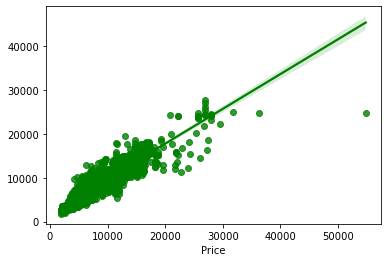

In [89]:
# checking R2 score for Gradient Boosting Regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# visualizing the predicted values
sns.regplot(y_test,predGB,color='g')
plt.show()

R2_Score: 0.8815400337657817
MAE: 697.5838682629361
MSE: 2316613.4996955497
RMSE: 1522.0425420123938


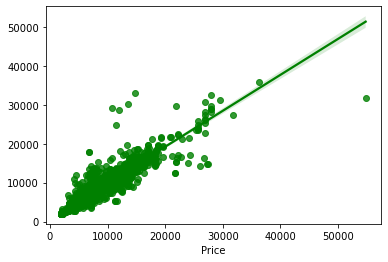

In [90]:
# checking R2 score for Bagging Regressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predBR))
print('MSE:',metrics.mean_squared_error(y_test, predBR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predBR)))

# visualizing the predicted values
sns.regplot(y_test,predBR,color='g')
plt.show()

R2_Score: 0.9115621529724738
MAE: 634.276381042059
MSE: 1729498.3007415119
RMSE: 1315.1039125261211


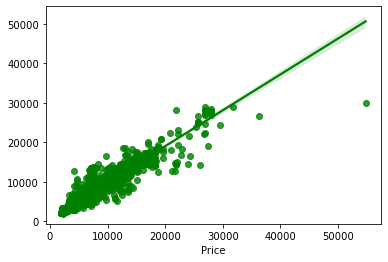

In [91]:
# checking R2 score for ExtraTrees Regressor
XT = ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
print('R2_Score:',r2_score(y_test,predXT))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predXT))
print('MSE:',metrics.mean_squared_error(y_test, predXT))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predXT)))

# visualizing the predicted values
sns.regplot(y_test,predXT,color='g')
plt.show()

# CROSS_VAL_SCORE

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
# checking cv score for Random Forest Regressor
print(cross_val_score(RFR ,x,y,cv=5).mean())

0.880551896046596


In [94]:
# checking cv score for Decision Tree Regressor
print(cross_val_score(DTR ,x,y,cv=5).mean())

0.8007745224366483


In [95]:
# checking cv score for Gradient Boosting Regressor
print(cross_val_score( GB,x,y,cv=5).mean())

0.8241602298549392


In [96]:
# checking cv score for Bagging  Regressor
print(cross_val_score(BR ,x,y,cv=5).mean())

0.8708384419531956


In [97]:
# checking cv score for ExtraTrees Regressor
print(cross_val_score(XT ,x,y,cv=5).mean())

0.9004001048964877


Difference between R2 score and Cross Validation score

From the difference between the R2 score and Cross Validation Score we can conclude that GB Regressor as our best fitting model .

We will perform Hyper Parameter Tuning on the best model.

# HyperParameter Tuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [99]:
# GB Regressor

parameters = {'n_estimators':[50,100,200,400],
             'max_depth':[3,5,7,9],
             'max_features':['auto','sqrt','log2'],
             'loss':['squared_error','absolute_error','huber','quantile']}

In [102]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [103]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 400]})

In [104]:
GCV.best_params_

{'loss': 'huber', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 400}

In [107]:
Final_model = GradientBoostingRegressor(loss='huber',max_depth=7,max_features='log2',n_estimators=400)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)

print("R2_Score:",r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))

R2_Score: 90.59271483858537
RMSE value: 1356.3542845268803
MAE: 684.5079432265204
MSE: 1839696.9451544255


After Tuning Our Model Score has Increased to 90.52 percentage

# Saving The Model

In [109]:
# saving the model using .pkl
import joblib
joblib.dump(Final_model,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

# Prediction using Saved Model

In [110]:
# loading the saved model
Model = joblib.load("Flight_Price_Prediction.pkl")

# Prediction
prediction = Model.predict(x_test)
prediction

array([ 3904.03182536, 13162.56868054, 11209.10829794, ...,
        2104.84731813, 14569.11382768,  4907.84812609])

In [116]:
pd.DataFrame([Model.predict(x_test),y_test],index=['Predicted','Original'])

,0,1,2,3,4,5,6,7,8,9,...,3176,3177,3178,3179,3180,3181,3182,3183,3184,3185
Predicted,3904.031825,13162.568681,11209.108298,13027.432127,16223.776345,8512.171649,6908.246987,10544.964181,5179.497502,11982.592193,...,15686.004097,8941.139511,6501.378357,5057.736718,7518.506058,12814.115646,9088.103047,2104.847318,14569.113828,4907.848126
Original,3419.000000,7408.000000,9581.000000,13029.000000,16263.000000,7229.000000,6587.000000,10368.000000,4804.000000,11732.000000,...,15554.000000,8452.000000,6093.000000,4667.000000,6785.000000,13538.000000,9134.000000,2017.000000,14924.000000,6038.000000


The predicted and actual values are almost same

Now we will use test dataset for getting prediction from the trained model

# IMPORTING TEST DATA

In [127]:
test_df=pd.read_excel('Test_set.xlsx')

In [128]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


All the columns have object datatye . We will convert them into numerical using encoding method.

Before that we will perform some feature engineering.

# Feature Engineering

In [129]:
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])

In [131]:
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])

In [132]:
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

In [136]:
#Now checking DTYPE
test_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

In [137]:
# extracting Day from Date_of_Journey column
test_df["Journey_Day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d%m%Y").dt.day

# extracting Month from Date_of_Journey column
test_df["Journey_Month"] = pd.to_datetime(test_df.Date_of_Journey, format="%d%m%Y").dt.month

In [138]:
# droping Date_of_Journey column
test_df.drop("Date_of_Journey",axis=1,inplace=True)

The columns Duration has values in terms of minutes and hours. Duration means the time taken by the plane to reach the destination and it is the difference between Departure time and the Arrival time. Now let's extract hours and minutes from Duration.



In [144]:
# converting duration column into list
duration=list(test_df["Duration"])
for i in range(len(duration)):
    
    # checking if duration contains only hour or minute
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+ " 0m"
        else:
            duration[i]="0h " + duration[i]

In [145]:
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    
    # extracting hours from Duration
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    
    # extracting minutes from Duaration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [146]:
# adding duration hours and duration mins to the data set
test_df["Duration_hours"]=duration_hours
test_df["Duration_mins"]=duration_mins

# Dropping Duration column
test_df.drop("Duration",axis=1,inplace=True)

Now let's extract values from Dep_Time Departure time means when a flight leves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [147]:
# Departure Time means the time when the journey starts from the source

# extracting Hours from Dep_Time column
test_df["Dep_Hour"]=pd.to_datetime(test_df["Dep_Time"]).dt.hour

# extracting Minutes from Dep_Time column
test_df["Dep_Min"]=pd.to_datetime(test_df["Dep_Time"]).dt.minute

In [148]:
# droping Dep_Time column
test_df.drop("Dep_Time",axis=1,inplace=True)

In [151]:
# Arrival time is time of arrival at the destination

# extracting hour from Arrival_Time
test_df["Arrival_Hour"]=pd.to_datetime(test_df["Arrival_Time"]).dt.hour

# extracting Minutes from Arriva_Time column
test_df["Arrival_Min"]=pd.to_datetime(test_df["Arrival_Time"]).dt.minute


# dropping Arrival_Time column
test_df.drop("Arrival_Time",axis=1,inplace=True)


KeyError: 'Arrival_Time'

In [152]:
# checking dataset again
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


In [153]:
# replacing "1 Long layover" and "2 Long layover" as "Long layover" in the column Additional Info
test_df["Additional_Info"] = test_df["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

In [154]:
# checking null values in the dataframe
test_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_mins      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

We dont ahve null values in the dataset

# splitting cat and Num columns

In [160]:
cat_1=test_df.select_dtypes(include=np.object).columns

In [161]:
num_1=test_df.select_dtypes(exclude=np.object).columns

# Identifying the Outliers

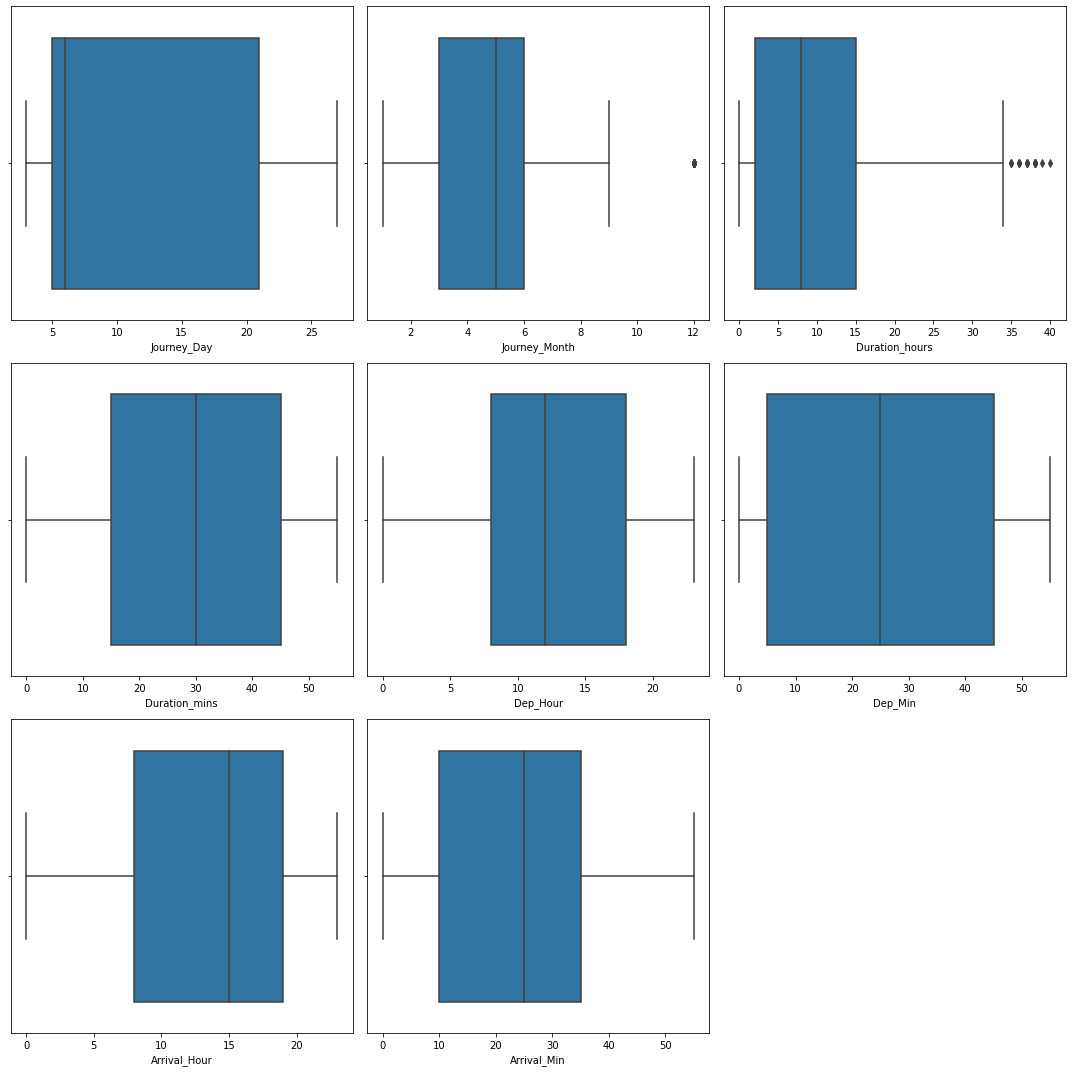

In [162]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in num_1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(test_df[column])
    plotnumber+=1
plt.tight_layout()

The Journey Month and duration have some outliers in it will use zscore to remove

In [168]:
# Feature containing outliers
feature = test_df[['Duration_hours','Journey_Month']]

# Using Zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature))
z

,Duration_hours,Journey_Month
0,0.022537,0.129089
1,0.737750,2.101227
2,1.527090,0.199601
3,0.335069,0.199601
4,0.976154,0.129089
...,...,...
2666,1.527090,0.129089
2667,0.976154,0.856981
2668,0.499346,0.129089
2669,0.573473,0.129089


In [169]:
# creating new dataframe
new_test_df = test_df[(z<3).all(axis=1)]
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,23,55,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,2,35,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,6,35,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,15,15,4,0,19,15


# Skewness finding

In [170]:
# checking the skewness
new_test_df.skew()

Journey_Day       0.475210
Journey_Month     0.591565
Duration_hours    0.795392
Duration_mins    -0.110629
Dep_Hour          0.083357
Dep_Min           0.132681
Arrival_Hour     -0.432551
Arrival_Min       0.110111
dtype: float64

# Skewnesss removal

In [171]:
new_test_df["Duration_hours"] = np.log1p(new_test_df["Duration_hours"])
new_test_df["Journey_Month"] = np.log1p(new_test_df["Journey_Month"])

In [172]:
new_test_df.skew()

Journey_Day       0.475210
Journey_Month    -0.541053
Duration_hours   -0.134743
Duration_mins    -0.110629
Dep_Hour          0.083357
Dep_Min           0.132681
Arrival_Hour     -0.432551
Arrival_Min       0.110111
dtype: float64

Skewness is successfully removed 

# Ecoding

In [175]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_test_df[cat]=new_test_df[cat].apply(LE.fit_transform)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,0,5,6,1.945910,2.397895,55,17,30,4,25
1,3,3,0,65,0,5,5,2.564949,1.609438,0,6,20,10,20
2,4,2,1,76,0,2,21,1.791759,3.178054,45,19,15,19,0
3,6,2,1,76,0,5,21,1.791759,2.639057,0,8,0,21,0
4,0,0,2,16,4,5,24,1.945910,1.098612,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,5,6,1.945910,3.178054,55,20,30,20,25
2667,3,3,0,43,4,5,27,1.386294,1.098612,35,14,20,16,55
2668,4,2,1,76,0,5,3,1.945910,1.945910,35,21,50,4,25
2669,1,2,1,76,0,5,3,1.945910,2.772589,15,4,0,19,15


# StandardScaler

In [176]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
new_test_df=pd.DataFrame(scaler.fit_transform(new_test_df), columns=new_test_df.columns)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.004605,0.031440,-0.294562,0.804966,-0.791072,0.474223,-0.706193,0.344970,0.374141,1.583185,0.766320,0.272445,-1.354818,0.025591
1,-0.431683,0.873978,-0.975287,0.398570,-0.791072,0.474223,-0.823069,1.565339,-0.579376,-1.697747,-1.172433,-0.252462,-0.503215,-0.272182
2,0.004605,0.031440,-0.294562,0.804966,-0.791072,-2.196932,1.046954,0.041078,1.317622,0.986652,1.118821,-0.514916,0.774190,-1.463273
3,0.877180,0.031440,-0.294562,0.804966,-0.791072,0.474223,1.046954,0.041078,0.665790,-1.697747,-0.819933,-1.302277,1.058057,-1.463273
4,-1.740546,-1.653635,0.386163,-1.411740,1.429790,0.474223,1.397583,0.344970,-1.197140,1.284918,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.304259,0.873978,-0.975287,-0.118662,-0.791072,0.474223,-0.706193,0.344970,1.317622,1.583185,1.295071,0.272445,0.916123,0.025591
2649,-0.431683,0.873978,-0.975287,-0.414222,1.429790,0.474223,1.748212,-0.758252,-1.197140,0.390119,0.237569,-0.252462,0.348388,1.812227
2650,0.004605,0.031440,-0.294562,0.804966,-0.791072,0.474223,-1.056822,0.344970,-0.172465,0.390119,1.471321,1.322260,-1.354818,0.025591
2651,-1.304259,0.031440,-0.294562,0.804966,-0.791072,0.474223,-1.056822,0.344970,0.827275,-0.802948,-1.524934,-1.302277,0.774190,-0.569955


# Price_Prediction

In [177]:
# predicting the flight price from the features of the testing data
Predicted_Price = Model.predict(new_test_df)
Predicted_Price

array([13773.01102799,  4404.43407533, 12659.62971382, ...,
       16895.50627975, 13077.38474505,  7958.40161165])

In [179]:
Prediction = pd.DataFrame()
Prediction['Price']= Predicted_Price
Prediction

,Price
0,13773.011028
1,4404.434075
2,12659.629714
3,10223.727953
4,4182.757084
...,...
2648,10220.602925
2649,6269.100518
2650,16895.506280
2651,13077.384745


# saving in CSV

In [180]:
# saving the predictions
Prediction.to_csv("Predicted_Flight_Price_Data.csv", index=False)

Hence The Airline Price Predicton is completed